In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Dataset Preprocess and devding

In [42]:
## Set Path Here before running the code
WORKING_DIRECTORY =  "/kaggle/input/augmented-dataset/augmented_data"

##  Name of classes
CLASSES = ['Mild_Demented',
           'Moderate_Demented',
           'Non_Demented',
           'Very_Mild_Demented']


In [43]:
# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generator for loading and augmenting images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(150, 150), batch_size=64)

# Initialize empty lists to store batches of data
X_batches = []
y_batches = []

# Iterate over the dataset generator to get batches of data
for i in range(len(train_dataset)):
    X_batch, y_batch = train_dataset[i]
    X_batches.append(X_batch)
    y_batches.append(y_batch)

# Concatenate batches to get the entire dataset
X = np.concatenate(X_batches, axis=0)
y = np.concatenate(y_batches, axis=0)

# Check the class indices
print(train_dataset.class_indices)


Found 13623 images belonging to 4 classes.
{'Mild_Demented_augmented': 0, 'Moderate_Demented_augmented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


In [45]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 2945), (1, 2791), (2, 2242), (3, 1558)]
Validation	 [(0, 1013), (1, 944), (2, 771), (3, 541)]
Test      	 [(0, 237), (1, 253), (2, 187), (3, 141)]


In [46]:
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 4195), (1, 3988), (2, 3200), (3, 2240)]
Classes Names according to index:	 {'Mild_Demented_augmented': 0, 'Moderate_Demented_augmented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


In [47]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9536, 150, 150, 3)
y_train shape: (9536, 4)
X_test shape: (818, 150, 150, 3)
y_test shape: (818, 4)


# LeNet

In [48]:
# Define the model architecture (LeNet)
model_lenet = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes in the output layer
])

In [49]:
# Compile the model
model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

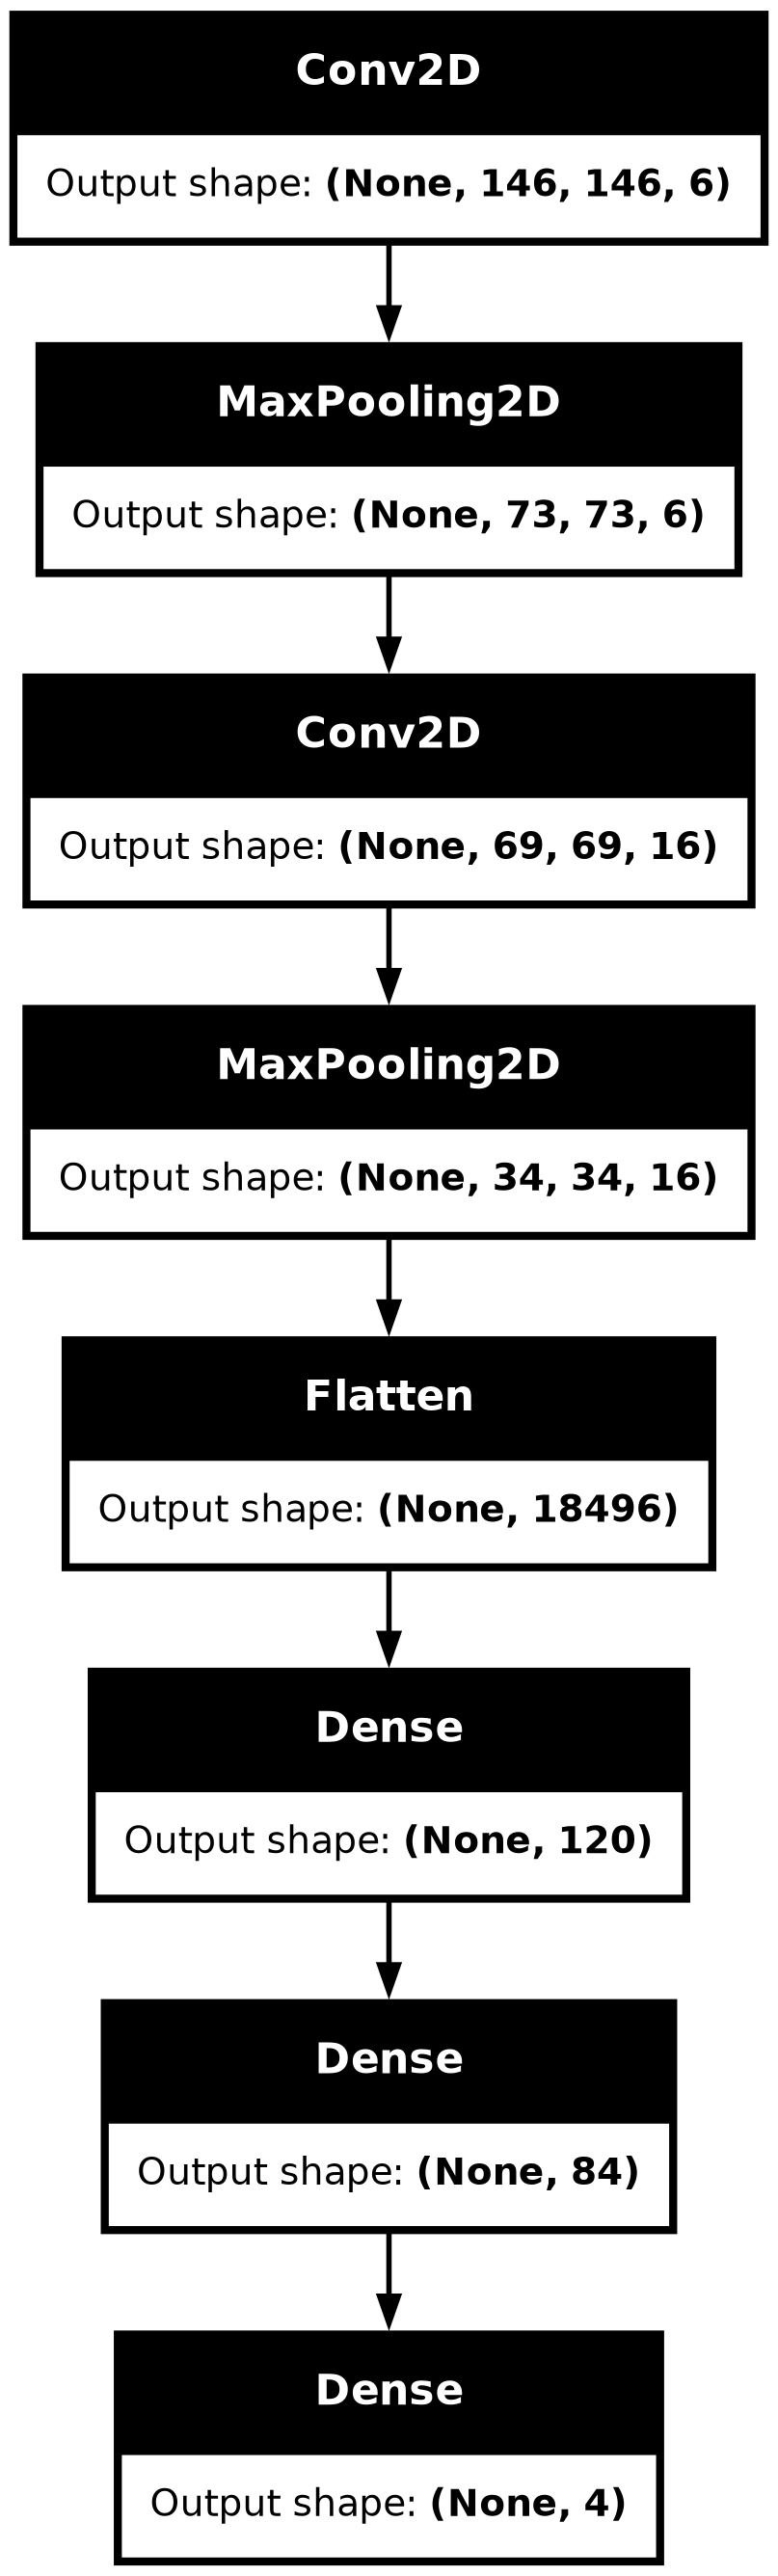

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
plot_model(model_lenet, to_file='LeNet_model.png', show_shapes=True)

## LeNet Training...

In [52]:
# Train the model with reshaped labels
history_lenet = model_lenet.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5720 - loss: 0.7848 - val_accuracy: 0.7494 - val_loss: 0.5439
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8179 - loss: 0.4008 - val_accuracy: 0.8851 - val_loss: 0.2694
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9169 - loss: 0.2043 - val_accuracy: 0.9315 - val_loss: 0.1841
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9755 - loss: 0.0716 - val_accuracy: 0.9450 - val_loss: 0.1544
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9917 - loss: 0.0271 - val_accuracy: 0.9474 - val_loss: 0.1625
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9967 - loss: 0.0142 - val_accuracy: 0.9462 - val_loss: 0.1655
Epoch 7/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9969 - loss: 0.0108 - val_accuracy: 0.9511 - val_loss: 0.1773
Epoch 8/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9894 - loss: 0.0291 - val_accu

# Evaluation

In [53]:
# Evaluate the model on the test set
test_loss_lenet, test_accuracy_lenet = model_lenet.evaluate(X_test, y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9696 - loss: 0.0843


In [54]:
print(f"LeNet Test Accuracy: {test_accuracy_lenet}, Test Loss: {test_loss_lenet}")

LeNet Test Accuracy: 0.9669926762580872, Test Loss: 0.09077820181846619


In [55]:
from sklearn.metrics import classification_report

# Make predictions on the validation data
y_pred = model_lenet.predict(X_val)

# Convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1013
           1       0.92      0.94      0.93       944
           2       0.98      0.96      0.97       771
           3       0.93      0.98      0.96       541

    accuracy                           0.95      3269
   macro avg       0.95      0.95      0.95      3269
weighted avg       0.95      0.95      0.95      3269



W0000 00:00:1715090462.806556     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Plots

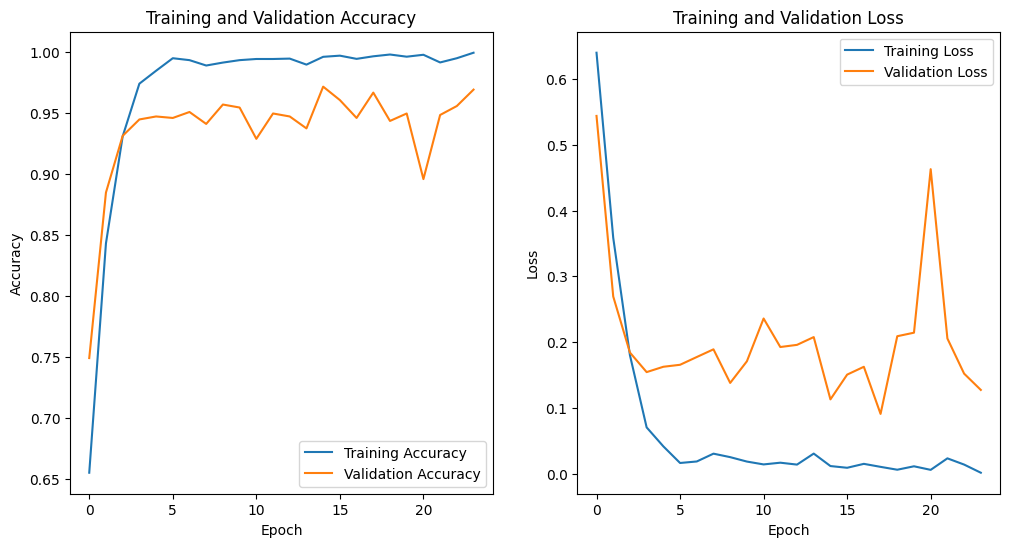

In [56]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_lenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_lenet.history['loss'], label='Training Loss')
plt.plot(history_lenet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# UNet

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, Input, concatenate, Flatten, Dense

In [80]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

# Define the model architecture (simplified U-Net)
def create_unet(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    flat = Flatten()(pool2)
    dense1 = Dense(128, activation='relu')(flat)
    outputs = Dense(4, activation='softmax')(dense1)  # 4 classes in the output layer

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [81]:
# Create U-Net model
model_unet = create_unet(input_shape=(150, 150, 3))

In [82]:
# Compile the model
model_unet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

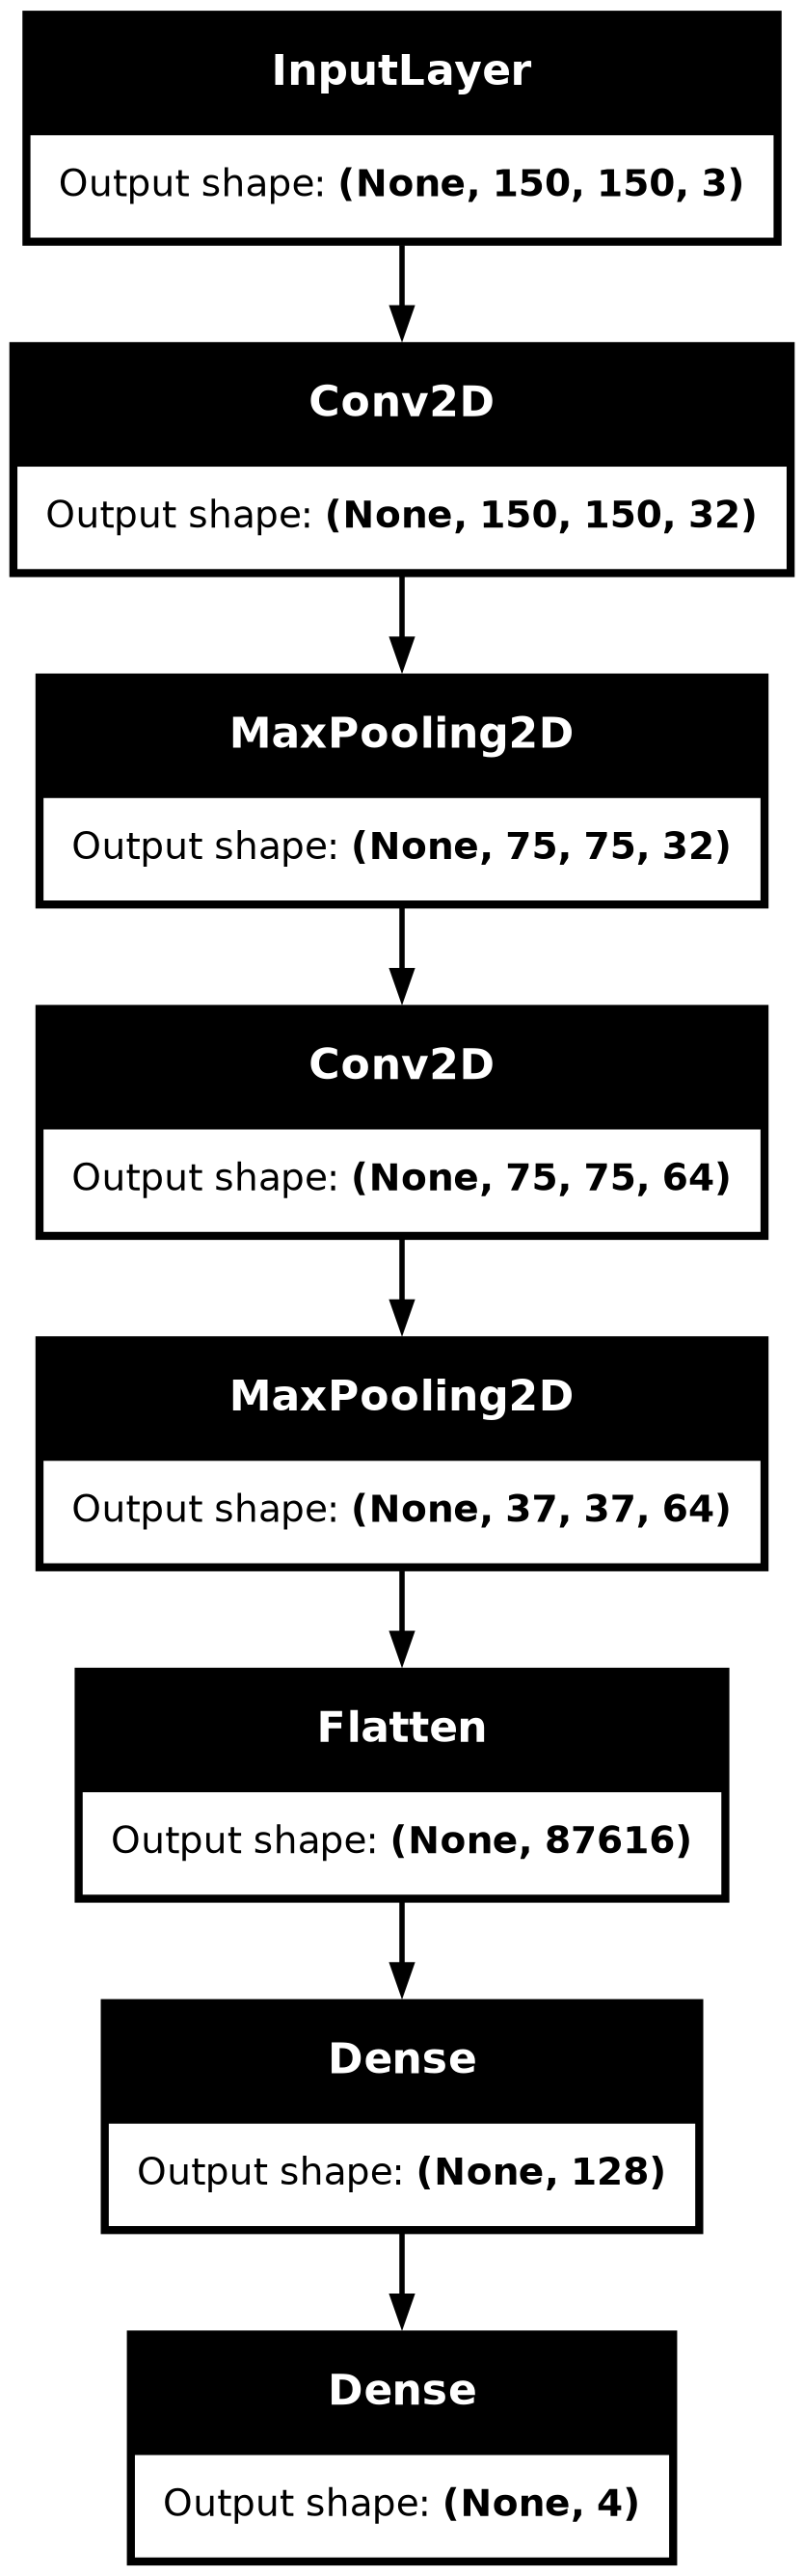

In [83]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
plot_model(model_unet, to_file='Unet_model.png', show_shapes=True)

## UNet Training

In [84]:
# Train the model
history_unet = model_unet.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5115 - loss: 1.4614 - val_accuracy: 0.6601 - val_loss: 0.6564
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7364 - loss: 0.5390 - val_accuracy: 0.7589 - val_loss: 0.5018
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8446 - loss: 0.3581 - val_accuracy: 0.8177 - val_loss: 0.4282
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9114 - loss: 0.2162 - val_accuracy: 0.8489 - val_loss: 0.3991
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9606 - loss: 0.1067 - val_accuracy: 0.8755 - val_loss: 0.3494
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9757 - loss: 0.0632 - val_accuracy: 0.8945 - val_loss: 0.3296


# UNet Evaluation

In [85]:
# Evaluate the model on the test set
test_loss_unet, test_accuracy_unet = model_unet.evaluate(X_test, y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6505 - loss: 0.6377


In [86]:
from sklearn.metrics import classification_report

# Make predictions on the validation data
y_pred = model_unet.predict(X_val)

# Convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.76      0.35      0.48      1013
           1       0.56      0.88      0.68       944
           2       0.78      0.78      0.78       771
           3       0.68      0.69      0.68       541

    accuracy                           0.66      3269
   macro avg       0.70      0.67      0.66      3269
weighted avg       0.69      0.66      0.64      3269



# Plot

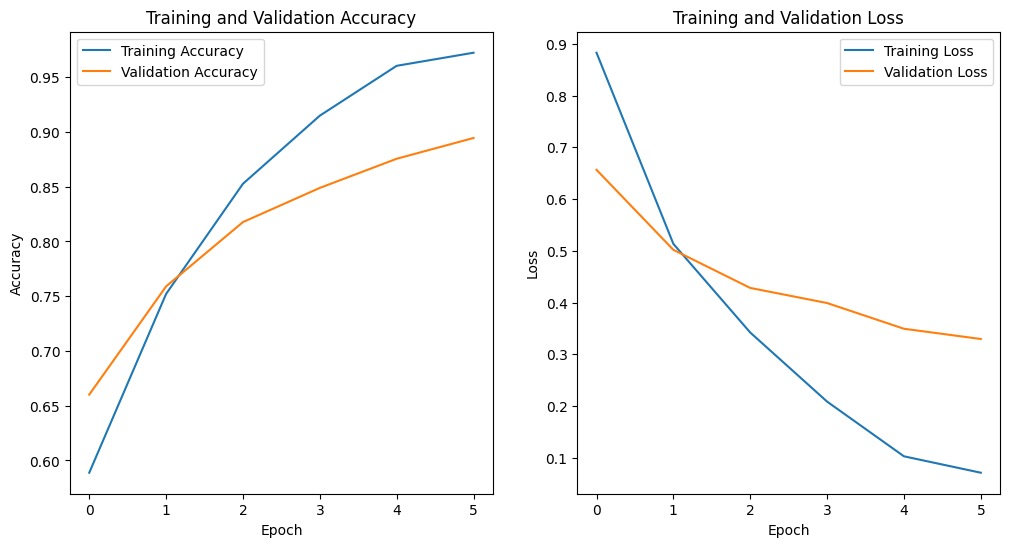

In [87]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_unet.history['accuracy'], label='Training Accuracy')
plt.plot(history_unet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_unet.history['loss'], label='Training Loss')
plt.plot(history_unet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()